# Import Libraries and files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Set path 
path = r'C:\Users\jecka\2023-12-05 Achievement 6'

In [26]:
# import anime dataset
anime = pd.read_csv(r'C:\Users\jecka\2023-12-05 Achievement 6\02 Data\Prepared Data\Anime Cleaned.csv', index_col = False)

# Consistancy Check

In [27]:
anime.head()

,anime_id,title,country_origin,story_origin,type,score,scored_by,status,episodes,source,members,favorites,episode_duration,total_duration,rating,start_year,start_season,genres,demographics
0,1,Cowboy Bebop,Japan,Japan,tv,8.75,923377,finished_airing,26.0,original,1788584,79192,24.00,624.00,R,1998.0,spring,Action / Award Winning / Sci-Fi,NaN
1,5,Cowboy Bebop: Tengoku no Tobira,Japan,Japan,movie,8.38,207777,finished_airing,1.0,original,363968,1477,115.18,115.18,R,2001.0,summer,Action / Sci-Fi,NaN
2,6,Trigun,Japan,Japan,tv,8.22,359862,finished_airing,26.0,manga,733966,15265,24.67,641.33,PG_13,1998.0,spring,Action / Adventure / Sci-Fi,NaN
3,7,Witch Hunter Robin,Japan,Japan,tv,7.25,43038,finished_airing,26.0,original,112755,618,25.00,650.00,PG_13,2002.0,summer,Action / Drama / Mystery / Supernatural,NaN
4,8,Bouken Ou Beet,Japan,Japan,tv,6.94,6445,finished_airing,52.0,manga,15093,14,23.00,1196.00,PG,2004.0,fall,Adventure / Fantasy / Supernatural,NaN


In [28]:
anime.columns

Index(['anime_id', 'title', 'country_origin', 'story_origin', 'type', 'score',
       'scored_by', 'status', 'episodes', 'source', 'members', 'favorites',
       'episode_duration', 'total_duration', 'rating', 'start_year',
       'start_season', 'genres', 'demographics'],
      dtype='object')

# Create a sample set

In [29]:
#Create a sample of df
sample = anime.sample(n=5000)

sample.head()

,anime_id,title,country_origin,story_origin,type,score,scored_by,status,episodes,source,members,favorites,episode_duration,total_duration,rating,start_year,start_season,genres,demographics
8895,23407,Toki: Kono Hoshi no Mirai wo Mitsumete,Japan,Japan,special,NaN,52,finished_airing,2.0,NaN,289,0,24.50,49.00,G,2003.0,fall,Drama,NaN
16279,40831,Sekai wo Musubou,Japan,Japan,music,NaN,76,finished_airing,1.0,original,165,0,2.37,2.37,G,1992.0,spring,NaN,NaN
14421,37845,Very! Merry!! Session!!!,Japan,Japan,music,5.35,547,finished_airing,1.0,original,949,1,2.40,2.40,G,2018.0,spring,NaN,NaN
21775,50378,Renjian Zui Deyi,China,China,ona,6.40,272,finished_airing,60.0,novel,1032,6,9.95,9.95,PG_13,2021.0,fall,Action / Fantasy,NaN
5573,8960,MonHun Nikki Girigiri Airou Mura: Airou Kiki I...,Japan,Japan,tv,5.91,346,finished_airing,10.0,game,1359,1,3.00,30.00,G,2010.0,summer,Action / Comedy,NaN


In [8]:
sample.describe()

,anime_id,score,scored_by,episodes,members,favorites,episode_duration,total_duration,start_year,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 23
count,5000.000000,3230.000000,5.000000e+03,4908.000000,5.000000e+03,5000.000000,4901.000000,4857.000000,4827.000000,0.0,0.0,0.0,1656.000000
mean,29559.748600,6.426053,1.919282e+04,14.122249,3.744339e+04,413.784600,22.397033,223.235203,2007.753884,NaN,NaN,NaN,14.524758
std,18046.763728,0.899299,9.148442e+04,39.505994,1.539784e+05,3342.188358,24.407133,721.826581,14.478599,NaN,NaN,NaN,9.056352
min,18.000000,2.650000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.100000,0.120000,1917.000000,NaN,NaN,NaN,1.000000
25%,10244.250000,5.810000,5.100000e+01,1.000000,2.177500e+02,0.000000,4.820000,12.270000,2002.000000,NaN,NaN,NaN,6.000000
50%,34643.500000,6.420000,3.245000e+02,2.000000,1.117500e+03,1.000000,17.000000,56.130000,2012.000000,NaN,NaN,NaN,14.000000
75%,44938.750000,7.090000,3.682500e+03,13.000000,1.014550e+04,19.250000,25.000000,280.000000,2018.000000,NaN,NaN,NaN,23.000000
max,56202.000000,9.040000,1.995309e+06,1471.000000,2.908788e+06,101669.000000,155.000000,36775.000000,2024.000000,NaN,NaN,NaN,31.000000


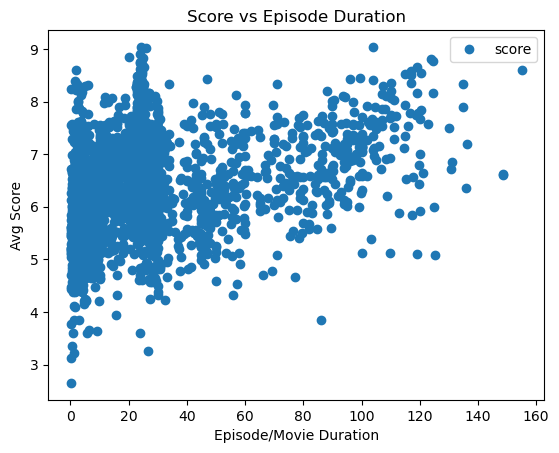

In [9]:
sample.plot(x = 'episode_duration', y= 'score', style='o') 
plt.title('Score vs Episode Duration')  
plt.xlabel('Episode/Movie Duration')
plt.ylabel('Avg Score')  
plt.show()

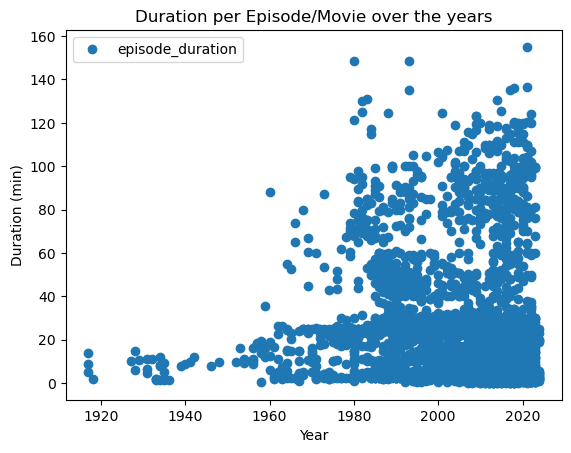

In [10]:
sample.plot(x = 'start_year', y= 'episode_duration', style='o') 
plt.title('Duration per Episode/Movie over the years')  
plt.xlabel('Year')
plt.ylabel('Duration (min)')  
plt.show()

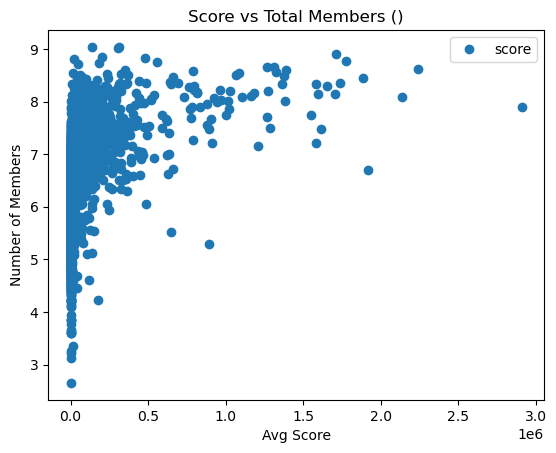

In [12]:
sample.plot(x = 'members' , y= 'score',style='o') 
plt.title('Score vs Total Members ()')  
plt.xlabel('Avg Score')  
plt.ylabel('Number of Members')  
plt.show()

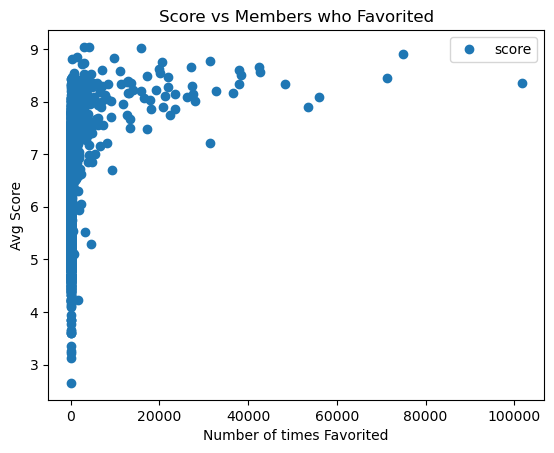

In [13]:
sample.plot(x ='favorites' , y= 'score', style='o') 
plt.title('Score vs Members who Favorited')  
plt.xlabel('Number of times Favorited')  
plt.ylabel('Avg Score')  
plt.show()

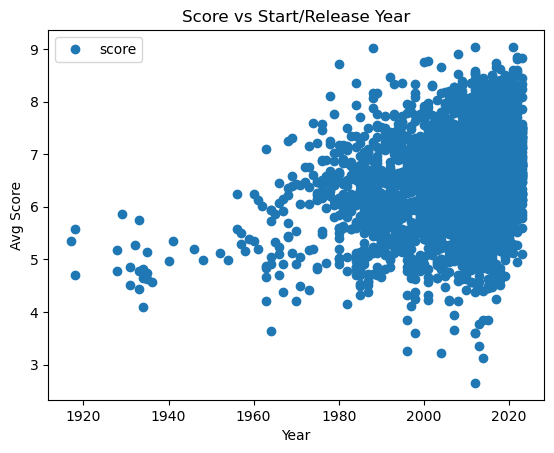

In [22]:
sample.plot(x ='start_year', y= 'score' ,style='o') 
plt.title('Score vs Start/Release Year')  
plt.xlabel('Year')  
plt.ylabel('Avg Score')  
plt.show()

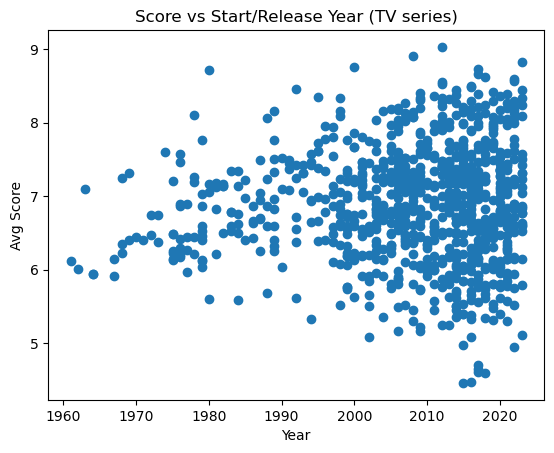

In [21]:
tv_data = sample[sample['type'] == 'tv']
plt.plot(tv_data['start_year'], tv_data['score'], marker='o', linestyle='')
plt.title('Score vs Start/Release Year (TV series)')
plt.xlabel('Year')
plt.ylabel('Avg Score')
plt.show()

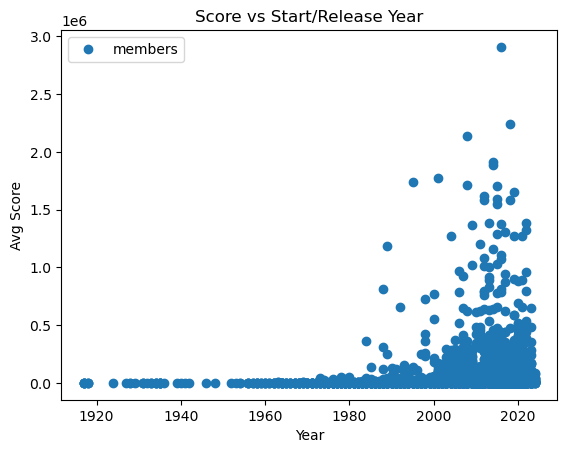

In [23]:
sample.plot(x ='start_year', y= 'members' ,style='o') 
plt.title('Score vs Start/Release Year')  
plt.xlabel('Year')  
plt.ylabel('Avg Score')  
plt.show()

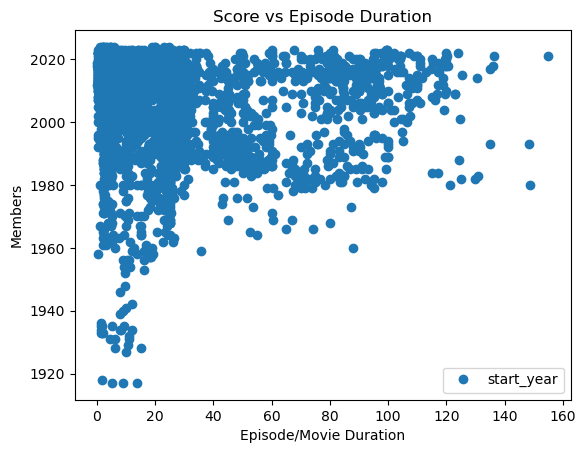

In [24]:
sample.plot(x = 'episode_duration', y= 'start_year', style='o') 
plt.title('Score vs Episode Duration')  
plt.xlabel('Episode/Movie Duration')
plt.ylabel('Members')  
plt.show()

# Creating a test set

In [30]:
# Check for null values
anime.isnull().sum()

anime_id                0
title                   0
country_origin          0
story_origin            0
type                   58
score                8933
scored_by               0
status                  0
episodes              547
source               3160
members                 0
favorites               0
episode_duration      596
total_duration        821
rating                579
start_year            867
start_season         4681
genres               4987
demographics        23328
dtype: int64

In [35]:
#Create a data set that drops entries without scores
df_sub = anime.dropna(subset=['score', 'start_year']).reset_index(drop=True)

In [38]:
df_sub.isnull().sum()

anime_id                0
title                   0
country_origin          0
story_origin            0
type                    1
score                   0
scored_by               0
status                  0
episodes               90
source               1395
members                 0
favorites               0
episode_duration      156
total_duration        244
rating                101
start_year              0
start_season          799
genres               1874
demographics        14404
dtype: int64

In [40]:
#reshape variables for regression 
X = df_sub['start_year'].values.reshape(-1, 1)
y = df_sub['score'].values.reshape(-1, 1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [42]:
#create linear regression object
regression = LinearRegression()

In [43]:
#fit regression to training set
regression.fit(X_train, y_train)

LinearRegression()

In [44]:
y_predicted = regression.predict(X_test)

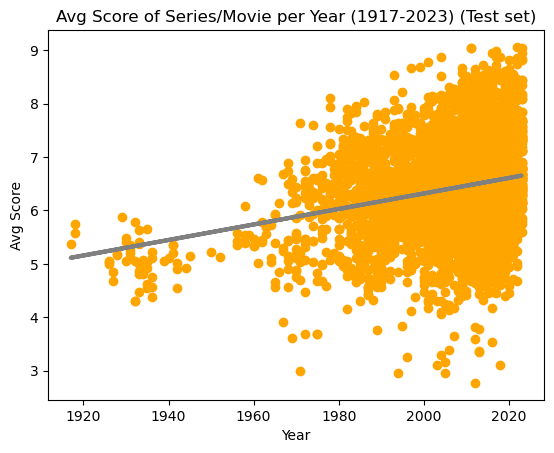

In [46]:
# Create a plot that shows the regression line from the model on the test set.
plt.scatter(X_test, y_test, color='orange')
plt.plot(X_test, y_predicted, color='grey', linewidth =3)
plt.title('Avg Score of Series/Movie per Year (1917-2023) (Test set)')
plt.xlabel('Year')
plt.ylabel('Avg Score')
plt.show()

In [47]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [48]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01451099]]
Mean squared error:  0.7477213478542329
R2 score:  0.05848723585723403


In [49]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.27,6.548878
1,7.55,6.461812
2,5.77,6.490834
3,5.93,6.621433
4,7.13,6.621433
5,6.39,6.490834
6,5.86,6.389257
7,5.41,6.157082
8,7.30,6.374746
9,6.68,6.592411


There's a positive trend between release year and score, but the overall predictive accuracy is modest. Maybe it focusing on one type will make a difference.

In [51]:
df_sub['type'].value_counts()

type
tv         4560
ova        3309
movie      2517
special    2060
ona        2008
music      1585
Name: count, dtype: int64

In [52]:
# Checking if just TV series is any different
df_tv = df_sub[df_sub['type'] == 'tv']

# Reshape variables for regression
X_tv = df_tv['start_year'].values.reshape(-1, 1)
y_tv = df_tv['score'].values.reshape(-1, 1)

In [53]:
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(X_tv, y_tv, test_size=0.3, random_state=0)

In [54]:
#create linear regression object
regression_tv = LinearRegression()

In [55]:
#fit regression to training set
regression_tv.fit(X_train_tv, y_train_tv)

LinearRegression()

In [56]:
y_predicted_tv = regression_tv.predict(X_test_tv)

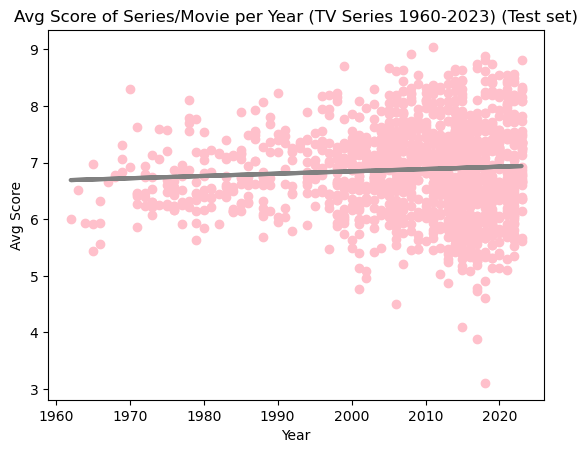

In [59]:
# Create a plot that shows the regression line from the model on the test set.
plt.scatter(X_test_tv, y_test_tv, color='pink')
plt.plot(X_test_tv, y_predicted_tv, color='grey', linewidth =3)
plt.title('Avg Score of Series/Movie per Year (TV Series 1960-2023) (Test set)')
plt.xlabel('Year')
plt.ylabel('Avg Score')
plt.show()

In [60]:
rmse_tv = mean_squared_error(y_test_tv, y_predicted_tv)
r2_tv = r2_score(y_test_tv, y_predicted_tv)
print('Slope:' ,regression_tv.coef_)
print('Mean squared error: ', rmse_tv)
print('R2 score: ', r2_tv)

Slope: [[0.00406195]]
Mean squared error:  0.62262446238418
R2 score:  -0.0001595966930367787


In [61]:
data_tv = pd.DataFrame({'Actual': y_test_tv.flatten(), 'Predicted': y_predicted_tv.flatten()})
data.head(30)

,Actual,Predicted
0,7.27,6.548878
1,7.55,6.461812
2,5.77,6.490834
3,5.93,6.621433
4,7.13,6.621433
5,6.39,6.490834
6,5.86,6.389257
7,5.41,6.157082
8,7.30,6.374746
9,6.68,6.592411


There are subtle differences, both models seem to have limited predictive power, and the relationship between release year and score for just the TV series is weaker than the data.

I did have to drop many entries so I would be able to test the dataset which may have affected the data.